In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# binary classification dataset (2D for visualization)
X, y = make_classification(
    n_samples=500, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [4]:
# Step 4: Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Helper function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="coolwarm", edgecolor="k")
    plt.title(title)
    plt.show()

Linear SVM Accuracy: 0.92

Classification Report (Linear SVM):
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        75
           1       0.86      1.00      0.93        75

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.93      0.92      0.92       150



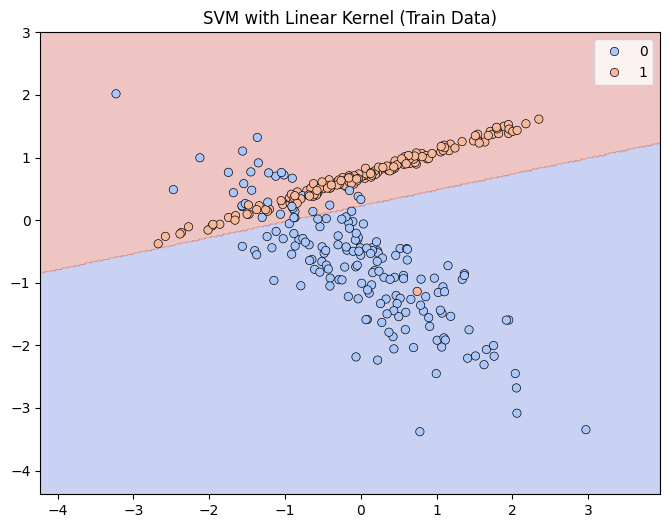

In [6]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear SVM):\n", classification_report(y_test, y_pred_linear))
plot_decision_boundary(svm_linear, X_train_scaled, y_train, "SVM with Linear Kernel (Train Data)")

RBF SVM Accuracy: 0.9466666666666667

Classification Report (RBF SVM):
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        75
           1       0.90      1.00      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



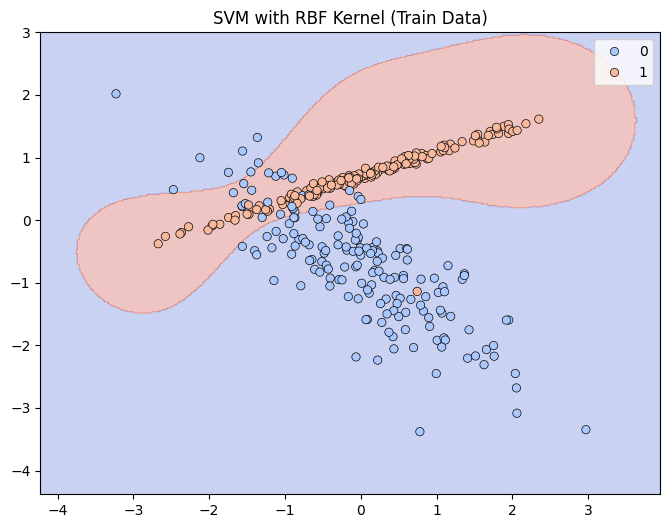

In [7]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF SVM):\n", classification_report(y_test, y_pred_rbf))

plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "SVM with RBF Kernel (Train Data)")


In [8]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, "scale"],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearch:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters from GridSearch: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.962857142857143


In [9]:
best_svm = grid.best_estimator_

In [10]:
# Cross-validation evaluation
cv_scores = cross_val_score(best_svm, X, y, cv=5)
print("Cross-Validation Accuracy (Best RBF SVM):", cv_scores.mean())

Cross-Validation Accuracy (Best RBF SVM): 0.9720000000000001


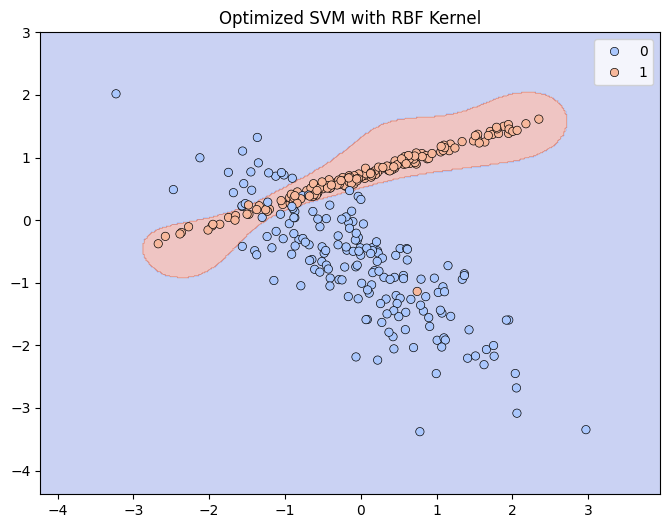

In [11]:
# Final Decision Boundary
plot_decision_boundary(best_svm, X_train_scaled, y_train, "Optimized SVM with RBF Kernel")